In [108]:
!pip install scipy==1.6.2

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
# from google.colab import drive
# drive.mount("/content/drive")
# data = pd.read_csv("/content/drive/My Drive/data.csv")

In [112]:
data = pd.read_csv('Life Expectancy Data.csv')

In [113]:
data.shape

(2938, 22)

In [114]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [115]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [116]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [117]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [118]:
# Strip spaces in column names
data.rename(columns={ col: col.strip() for col in data.columns }, inplace=True)

In [119]:
data = data.dropna(axis=0)

## Step 1
Choose subsample with main variables for your further analysis.

In [120]:
vars_subsample = ['Life expectancy', 'Total expenditure', 'Schooling', 'BMI', 'GDP']

## Step 2

You need to make a non-parametric estimation of probability density function (PDF) in form of histogram and using
kernel density function (or probability law in case of discrete random variable (RV)).

In [121]:
def plot_kernel(data, var):
  plt.figure(figsize=(10, 8))   
  
  kernel = scipy.stats.gaussian_kde(data[var])

  min_var, max_var = data[var].min(), data[var].max()
  x = np.linspace(min_var, max_var, len(data))
  kde_values = kernel(x)

  sns.distplot(data[var],
               kde=False,
               norm_hist=True, 
               label=f'Distribution of ' + var)
  plt.plot(x, kde_values)

  plt.ylabel('p')
  plt.xlabel('Distribution of ' + var)
  plt.legend()
  plt.show()

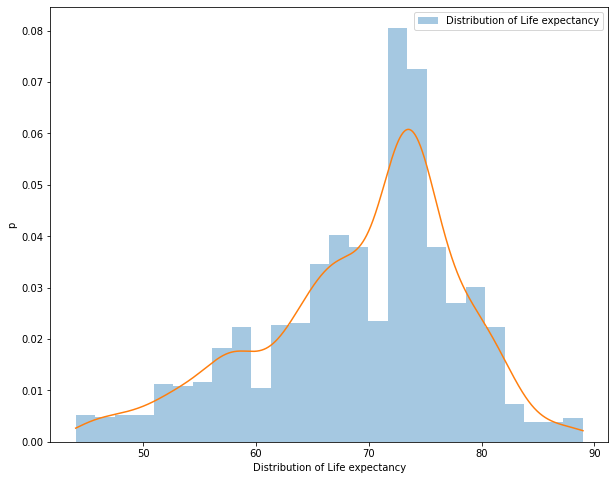

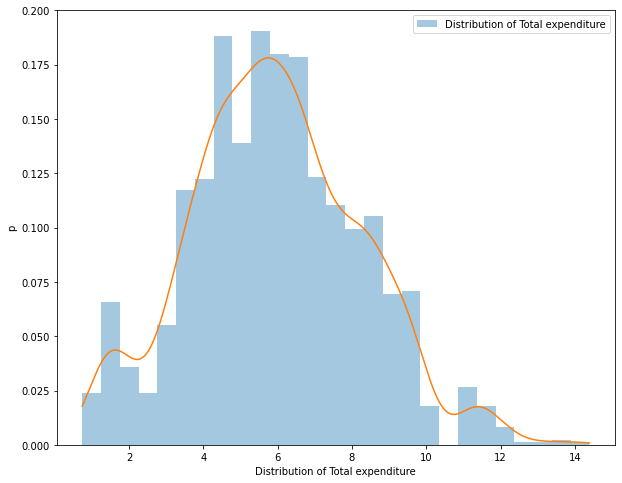

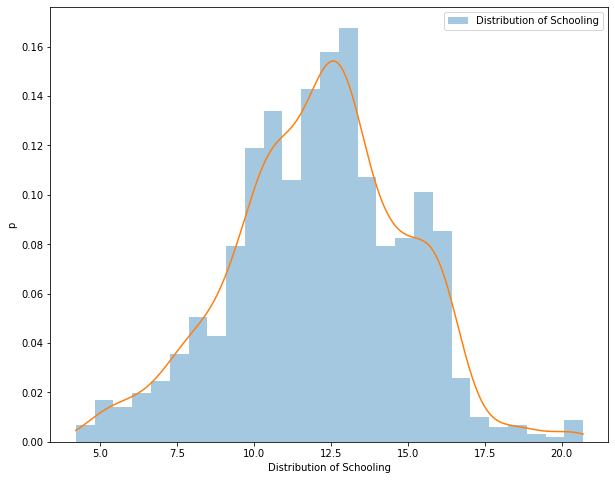

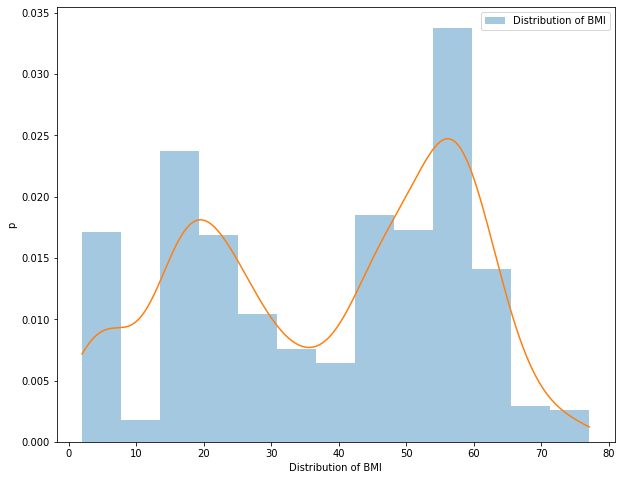

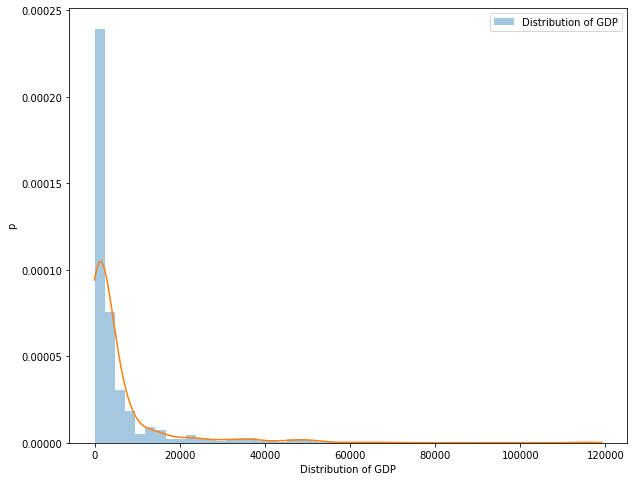

In [122]:
for var in vars_subsample:
  plot_kernel(data, var)

## Step 3

You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

mean - 69.30230442692543; variance - 77.38429080289899; std - 8.796834135238596; median - 71.7


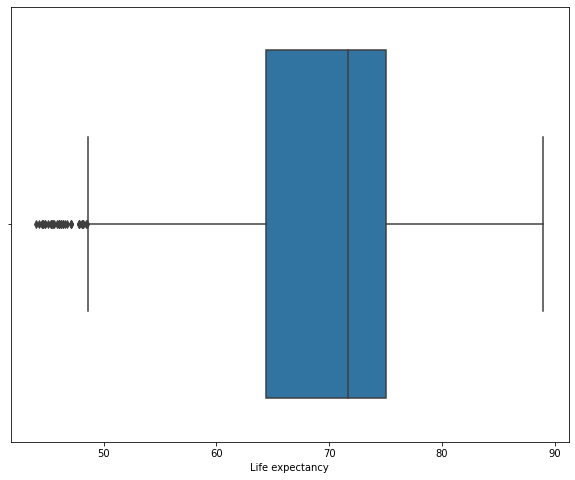

mean - 5.955924802910845; variance - 5.2871733098759535; std - 2.299385420036396; median - 5.84


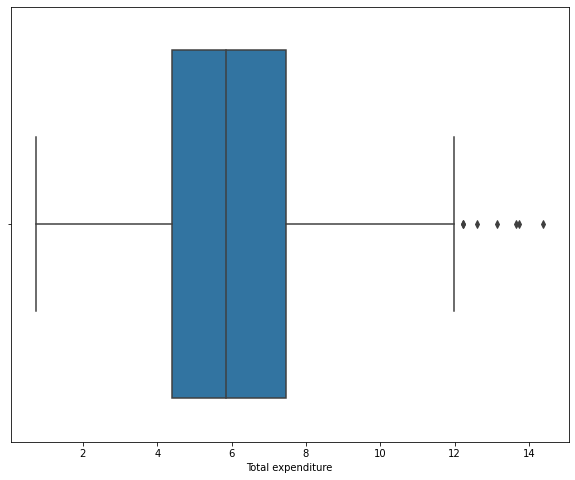

mean - 12.119890842935117; variance - 7.814191492931893; std - 2.7953875389526748; median - 12.3


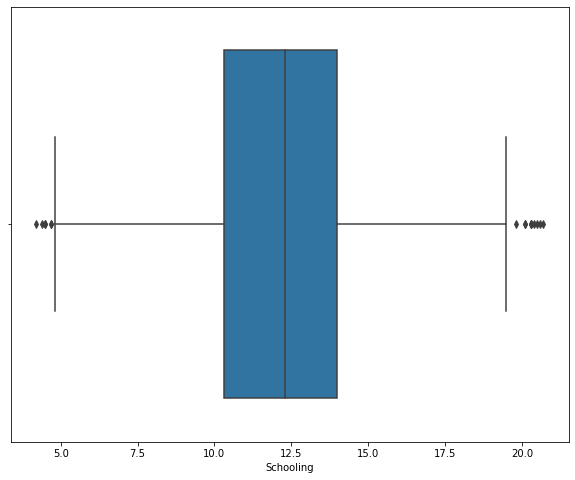

mean - 38.1286234081261; variance - 390.230369523748; std - 19.754249404210427; median - 43.7


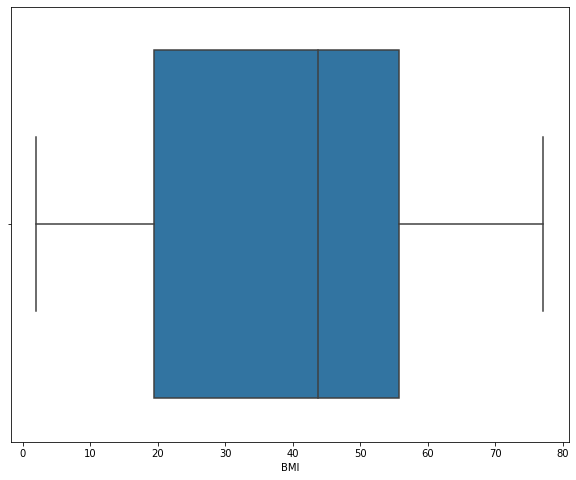

mean - 5566.031886817592; variance - 131696283.50166227; std - 11475.900117274561; median - 1592.572182


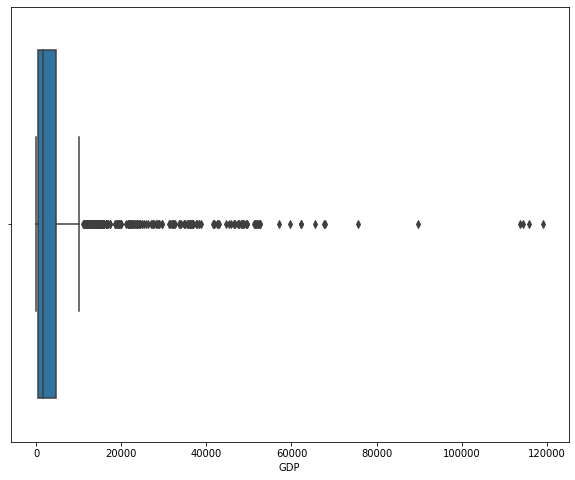

In [123]:
def plot_whiskers(data, param):
  mean = data[param].mean()
  var = data[param].var()
  std = data[param].std()
  median = data[param].median()

  print('mean - {}; variance - {}; std - {}; median - {}'.format(mean, var, std, median))

  plt.figure(figsize=(10, 8))
  sns.boxplot(x=data[param])
  plt.xlabel(param)
  plt.show()
  
  
for var in vars_subsample:
  plot_whiskers(data, var)

## Step 4

Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

In [124]:
def theoretical(data, var, distr, test=scipy.stats.kstest):
  # The distribution parameters are determined using the fit function based
  # on the maximum likelihood method
  x = np.linspace(np.min(data[var]), np.max(data[var]))
  params = getattr(scipy.stats, distr).fit(data[var])
  ks = test(data[var], distr, params)
  return ks

def check(data, var, distributions, test=scipy.stats.kstest):
  print('Variable {}:'.format(var))
  for distr in distributions:
    ks = theoretical(data, var, distr, test=test)
    if ks.pvalue > 0.05:
      print('  Null hypothesis can be accepted for {} distribution (KStest pvalue: {})'.format(distr, ks.pvalue))
  print('-----------------')

# fs = ['norm', 'alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone', 'laplace', 'levy', 'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy']
fs = ['norm', 'lognorm', 'gamma', 'expon', 'uniform']

print("Using kstest:")
for var in vars_subsample:
  check(data, var, fs, test=scipy.stats.kstest)

print('Using Cramer von Mises test:')
for var in vars_subsample:
  check(data, var, fs, test=scipy.stats.cramervonmises)

Using kstest:
Variable Life expectancy:
-----------------
Variable Total expenditure:
  Null hypothesis can be accepted for norm distribution (KStest pvalue: 0.056510891352609005)
  Null hypothesis can be accepted for lognorm distribution (KStest pvalue: 0.21899455549062552)
  Null hypothesis can be accepted for gamma distribution (KStest pvalue: 0.21197570473140637)
-----------------
Variable Schooling:
  Null hypothesis can be accepted for norm distribution (KStest pvalue: 0.08489981686060599)
-----------------
Variable BMI:
-----------------
Variable GDP:
-----------------
Using Cramer von Mises test:
Variable Life expectancy:
-----------------
Variable Total expenditure:
  Null hypothesis can be accepted for norm distribution (KStest pvalue: 0.1120529206105173)
  Null hypothesis can be accepted for lognorm distribution (KStest pvalue: 0.41193362754902474)
  Null hypothesis can be accepted for gamma distribution (KStest pvalue: 0.40776067993426257)
-----------------
Variable Schooli

Some variables cannot be fit using distribution functions from the list above. We need to split the distribution in parts, for example, using GaussianMixture.

We will use the function below later to perform the splitting automatically, as for now we skip them.

In [125]:
from sklearn.mixture import GaussianMixture

def split_distribution_mixture(data, var, n=2):
  """
  Splits a distribution into pieces.
  Returns a list of observations in form of { data, min_val, max_val }. 
  """
  reshaped = np.array(data[var]).reshape(-1, 1)
  est = GaussianMixture(n_components=n, random_state=42).fit(reshaped)
  mask = est.predict(reshaped)
  df = pd.DataFrame(data={var: data[var], 'class': mask})
  res = []
  for i in range(n):
    subset = df[df['class'] == i]
    subset.drop(columns='class', inplace=True)
    min_val, max_val = subset[var].min(), subset[var].max()
    res.append({ 'data': subset, 'min_val': min_val, 'max_val': max_val })
  return res

In [126]:
splitted_le = split_distribution_mixture(data, 'Life expectancy', n=3)
splitted_le

[{'data':       Life expectancy
  0                65.0
  156              67.8
  157              67.8
  201              68.2
  202              67.8
  ...               ...
  2836             67.3
  2837             67.8
  2838             67.2
  2839             67.1
  2908             63.0
  
  [358 rows x 1 columns], 'max_val': 68.3, 'min_val': 61.2},
 {'data':       Life expectancy
  1                59.9
  2                59.9
  3                59.5
  4                59.2
  5                58.8
  ...               ...
  2933             44.3
  2934             44.5
  2935             44.8
  2936             45.3
  2937             46.0
  
  [295 rows x 1 columns], 'max_val': 61.1, 'min_val': 44.0},
 {'data':       Life expectancy
  16               77.8
  17               77.5
  18               77.2
  19               76.9
  20               76.6
  ...               ...
  2853             69.6
  2854             69.4
  2855             69.3
  2856             69.1
  2857  

# Step 4 & 5

The code below covers two steps at the same time.



First, we define functions to estimate our parameters:

In [127]:
# MLE
def estimate_params(data, var, distr):
  return list(getattr(scipy.stats, distr).fit(data[var]))

In [128]:
# An auxiliary function to get number of parameters of a distribution (used
# below)
def get_number_of_params(distr):
  return len(getattr(scipy.stats.distributions, distr).fit([0, 1]))

assert 3 == get_number_of_params('gamma')
assert 2 == get_number_of_params('norm')

In [129]:
# Least squares
def estimate_params_ls(data, var, distr, bins=90):
  min_val, max_val = data[var].min(), data[var].max()
  dists, _edges = np.histogram(data[var], bins=bins, density=True)
  xs = np.linspace(min_val, max_val, num=bins)
  number_of_params = get_number_of_params(distr)
  # This is unfortunate. `scipy.optimize.curve_fit` uses argspec to determine
  # how many parameters does `f` function have.
  # We could somehow mess with argspec of `f` to make it accept as many 
  # arguments as needed for `pdf` function, but we decided that it's not worth
  # the time, since we only need 3 cases for 2-6 arguments. Hence the
  # boilerplate below:
  if number_of_params == 2:
    def f(xdata, loc, scale):
      return getattr(scipy.stats.distributions, distr).pdf(
          xdata, loc=loc, scale=scale)
  elif number_of_params == 3:
    def f(xdata, arg, loc, scale):
      return getattr(scipy.stats.distributions, distr).pdf(
          xdata, arg, loc=loc, scale=scale)
  elif number_of_params == 4:
    def f(xdata, arg1, arg2, loc, scale):
      return getattr(scipy.stats.distributions, distr).pdf(
          xdata, arg1, arg2, loc=loc, scale=scale)
  elif number_of_params == 5:
    def f(xdata, arg1, arg2, arg3, loc, scale):
      return getattr(scipy.stats.distributions, distr).pdf(
          xdata, arg1, arg2, arg3, loc=loc, scale=scale)
  elif number_of_params == 6:
    def f(xdata, arg1, arg2, arg3, arg4, loc, scale):
      return getattr(scipy.stats.distributions, distr).pdf(
          xdata, arg1, arg2, arg3, arg4, loc=loc, scale=scale)
  else:
    # This will never happen, all distributions have 2-6 parameters.
    raise ValueError("Number of args: " + str(number_of_params))
  # `curve_fit` contains the implementation of least squares.
  # Due to instability of LS, we decided to use result of MLE as 
  # "first guess" (p0 parameter of curve_fit)
  p, _ = scipy.optimize.curve_fit(f, xs, dists, 
                                  p0=estimate_params(data, var, distr),
                                  maxfev=2000)
  return p


The idea here is: for each variable We try to split the distribution in some number of parts (first we try 1, then 2, etc.) For each piece we want to find an acceptable fit. We try different distributions, different estimator functions, and different statistical tests. We check pvalue to find out if we can accept the null hypothesis. 

In [130]:
# We removed some of available distributions from the list (they were too slow 
# to fit).
all_distrs = [
  'norm', 'alpha', 'anglit', 'johnsonsb', 'arcsine', 'argus', 'beta', 
  'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine',
  'crystalball', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 
  'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 
  'genlogistic', 'gennorm', 'genpareto', 
  'genexpon', 
  'genextreme', 
  'gausshyper',
  'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r',
  'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm',
  'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu',
  'kappa4', 'kappa3', 'ksone', 'laplace', 'levy', 'levy_l', 'logistic',
  'loggamma', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell',
  'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'norminvgauss',
  'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist',
  'rice', 'recipinvgauss', 'semicircular', 'skewnorm', 't', 'trapezoid',
  'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises',
  'vonmises_line', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy']

def run_all(data, vars_subsample, significance_level=0.05):
  results = []
  # For each variable
  for var in vars_subsample:
    found_for_var = False
    print('Estimating distribution of ', var)
    var_results = []
    # We try to split the distribution in `num_pieces` parts (first we try 1, 
    # then 2, etc.)
    for num_pieces in range(1, 10):
      num_pieces_results = []
      print('  Trying to split the distribution into', num_pieces, 'pieces')
      pieces = split_distribution_mixture(data, var, n=num_pieces)
      found_for_all_pieces = True
      # For each piece we want to find an acceptable fit.
      for piece, piece_num in zip(pieces, range(len(pieces))):
        print('    Estimating distribution of piece number ', piece_num)
        found_for_piece = False
        # We will try different distributions,
        for distr in all_distrs:
          print('      trying distr=', distr)
          # For each of the distributions, we try different estimator functions.
          for estimator in [estimate_params_ls, estimate_params]:
            # `estimate_params_ls` throws an exception sometimes. We should
            # ignore it.
            try:
              params = estimator(piece['data'], var, distr)
            except RuntimeError as _:
              continue
            # For each estimator functions we try different statistical tests.
            #
            # We commented out `cramervonmises` (see below) because the 
            # documentation states that if the parameters are estimated from
            # the data, the computed p-value is not reliable.
            # Which is true indeed.
            for test in [scipy.stats.kstest]: #, scipy.stats.cramervonmises]:  
              test_result = test(piece['data'][var], distr, params)
              # We check pvalue to find out if we can accept the null 
              # hypothesis:
              if test_result.pvalue > significance_level:
                found_for_piece = True
                print('        TEST PASSED: var={}, num_pieces={}, piece={}'.format(var, num_pieces, piece_num))
                # We put all the parameters into a list for later use.
                num_pieces_results.append({
                    'var': var,
                    'piece': piece, 
                    'distr': distr,
                    'params': params,
                    'test_result': test_result,
                    'test': test,
                    'estimator': estimator,
                    'num_pieces': num_pieces,
                    'piece_num': piece_num
                })
                # Nothing interesting below this line.
                break
            if found_for_piece:
              break
          if found_for_piece:
            break
        if not found_for_piece:
          found_for_all_pieces = False
          break
      if found_for_all_pieces:
        var_results = num_pieces_results
        found_for_var = True
        break
    if found_for_var:
      results.append(var_results)
  return results

In [131]:
estimate_params_ls(data, 'Alcohol', 'burr')

array([5.02005642e+00, 1.31314702e-01, 1.00000000e-02, 1.32823967e+01])

In [132]:
estimate_params(data, 'Alcohol', 'burr')

[0.9971685246479111,
 0.20610036011633281,
 0.009999999999999998,
 10.984595325690854]

In [133]:
results = run_all(data, vars_subsample)

Estimating distribution of  Life expectancy
  Trying to split the distribution into 1 pieces
    Estimating distribution of piece number  0
      trying distr= norm
      trying distr= alpha
      trying distr= anglit
      trying distr= johnsonsb
      trying distr= arcsine
      trying distr= argus
      trying distr= beta
      trying distr= betaprime
      trying distr= bradford
      trying distr= burr
      trying distr= burr12
      trying distr= cauchy
      trying distr= chi
      trying distr= chi2
      trying distr= cosine
      trying distr= crystalball
      trying distr= dgamma
      trying distr= dweibull
      trying distr= expon
      trying distr= exponnorm
      trying distr= exponweib
      trying distr= exponpow
      trying distr= f
      trying distr= fatiguelife
      trying distr= fisk
      trying distr= foldcauchy
      trying distr= foldnorm
      trying distr= genlogistic
      trying distr= gennorm
      trying distr= genpareto
      trying distr= genexpo

We get a list of splits for each variable, with name of a distribution and parameters for it:

In [134]:
def plot(data, var, distr, estimator, est_str=''):
    bins = 90
    min_val = data[var].min()
    max_val = data[var].max()
    dists, _edges = np.histogram(data[var], bins=bins, density=True)
    xs = np.linspace(min_val, max_val, num=bins)
    plt.plot(xs, dists, color='grey')
    params = estimator(data, var, distr)
    print('parameters: ', params)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    ys = getattr(scipy.stats.distributions, distr).pdf(
      xs, loc=loc, scale=scale, *arg)
    plt.plot(xs, ys)
    plt.xlabel(f'Empirical and theoretical distributions for ' + var + ' (' + est_str +')')
    plt.show()

parameters:  [12.26458502  2.73833502]


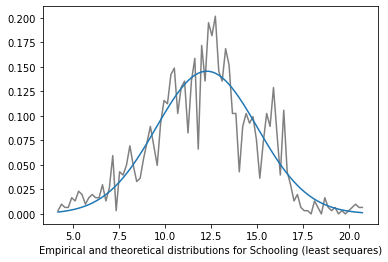

parameters:  [12.11989084293511, 2.794539809580956]


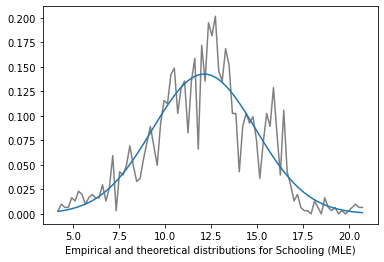

In [135]:
plot(data, 'Schooling', 'norm', estimate_params_ls, 'least sequares')
plot(data, 'Schooling', 'norm', estimate_params, 'MLE')

parameters:  [-1.70012936e+01  2.32626640e+00 -2.84360567e+04  2.85257004e+04]


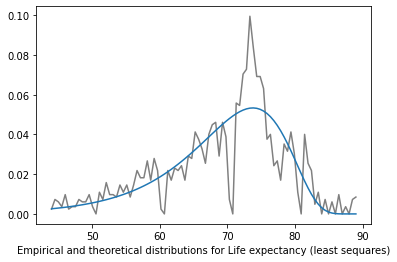

parameters:  [-8.648960164194108, 3.6070697562494303, -297.9195719226966, 401.6807581082239]


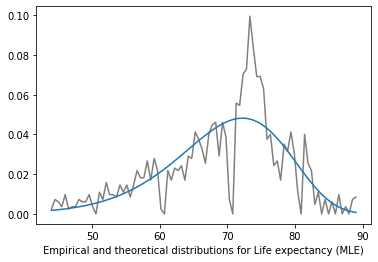

In [136]:
plot(data, 'Life expectancy', 'johnsonsb', estimate_params_ls, 'least sequares')
plot(data, 'Life expectancy', 'johnsonsb', estimate_params, 'MLE')

In [137]:
results

[[{'distr': 'johnsonsb',
   'estimator': <function __main__.estimate_params_ls>,
   'num_pieces': 3,
   'params': array([-0.29172464,  0.5910959 , 60.86603503,  7.5704383 ]),
   'piece': {'data':       Life expectancy
    0                65.0
    156              67.8
    157              67.8
    201              68.2
    202              67.8
    ...               ...
    2836             67.3
    2837             67.8
    2838             67.2
    2839             67.1
    2908             63.0
    
    [358 rows x 1 columns], 'max_val': 68.3, 'min_val': 61.2},
   'piece_num': 0,
   'test': <function scipy.stats.stats.kstest>,
   'test_result': KstestResult(statistic=0.04978051601360767, pvalue=0.3267268706322065),
   'var': 'Life expectancy'},
  {'distr': 'johnsonsb',
   'estimator': <function __main__.estimate_params_ls>,
   'num_pieces': 3,
   'params': array([-0.68359865,  0.64404353, 41.62143422, 18.57035258]),
   'piece': {'data':       Life expectancy
    1                59

Let's plot the results. We combine distinct pieces on a single plot, that's why there are tiny gaps in it.

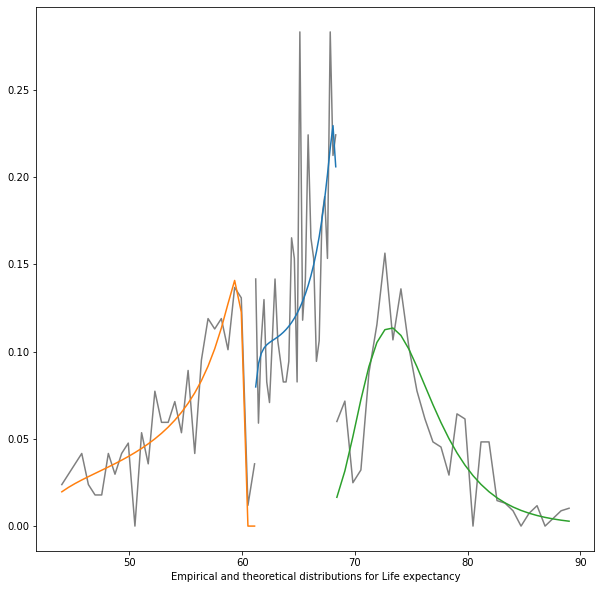

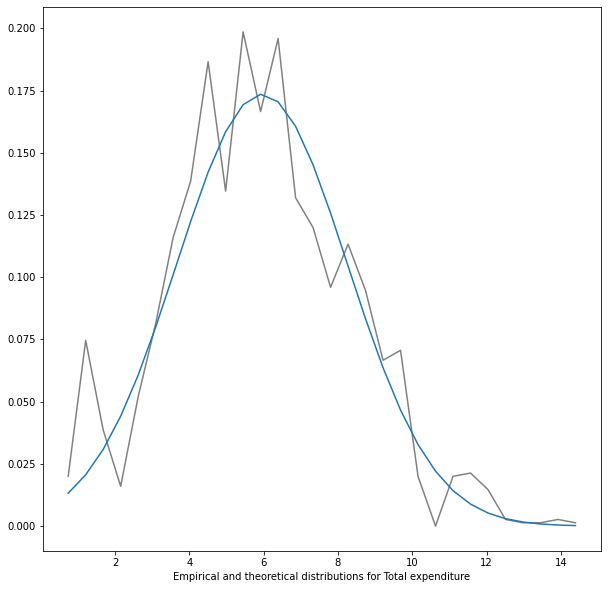

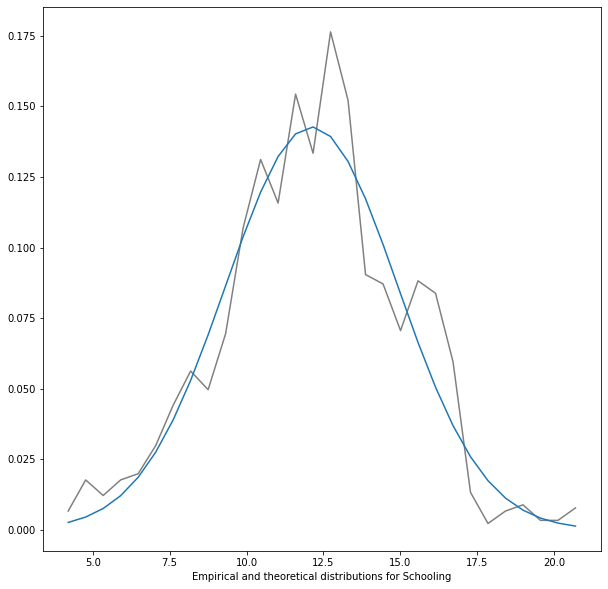

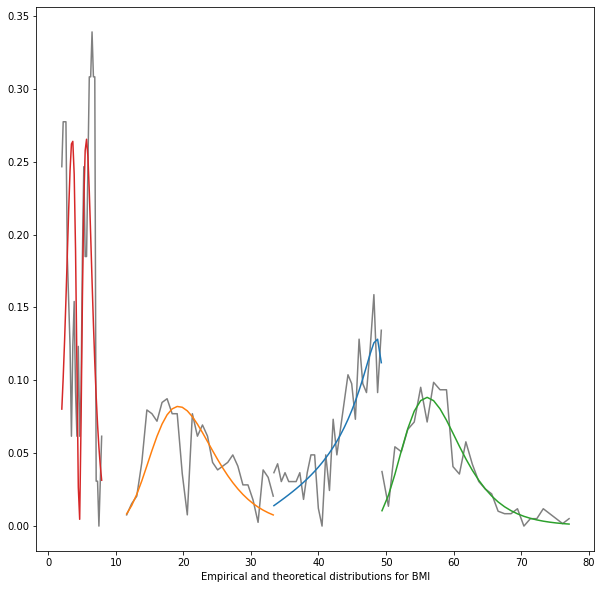

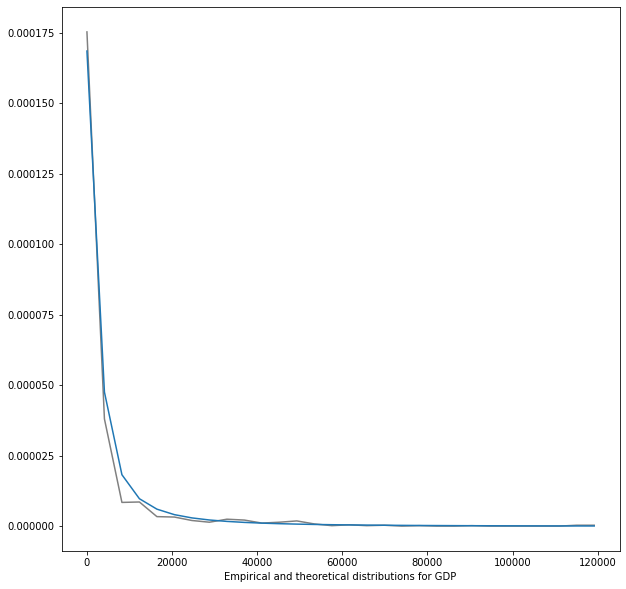

In [138]:
bins = 30

for results_for_var in results:
  plt.figure(figsize=(10,10))
  i = 0
  for result_for_piece in results_for_var:
    r_data = result_for_piece['piece']['data']
    var = result_for_piece['var']
    params = result_for_piece['params']
    distr = result_for_piece['distr']
    min_val = result_for_piece['piece']['min_val']
    max_val = result_for_piece['piece']['max_val']
    dists, _edges = np.histogram(r_data[var], bins=bins, density=True)
    xs = np.linspace(min_val, max_val, num=bins)
    plt.plot(xs, dists, color='grey')
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    ys = getattr(scipy.stats.distributions, distr).pdf(
      xs, loc=loc, scale=scale, *arg)
    plt.plot(xs, ys)
    plt.xlabel(f'Empirical and theoretical distributions for ' + var)
    i += 1
  plt.show()

## Step 6

Validate your estimated parameters using QQ biplots.


We draw a separate biplot for each piece.

In [139]:
def qq_biplot(data, var, distr, params):
  """ 
  Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
  """

  min_val, max_val = data[var].min(), data[var].max()
  x = np.linspace(min_val, max_val, num=100)

  # Calculation of quantiles
  percs = np.linspace(0, 100, num=100)
  qn_first = np.percentile(data[var], percs)
  qn_distr = getattr(scipy.stats, distr).ppf(percs / 100.0, *params)

  # Building a quantile biplot
  plt.figure(figsize=(10,10))
  plt.plot(qn_first, qn_distr, ls="", marker="o", markersize=3)
  plt.plot(x, x, color="k", ls="--")
  plt.xlim(min_val, max_val)
  plt.ylim(min_val, max_val)
  plt.xlabel(f'Empirical distribution of ' + var + ' on [' + str(min_val) + 
             ' .. ' + str(max_val)+ ']')
  plt.ylabel('Theoretical distribution of ' + var + ' (distr=' + distr + ')')
  plt.show()

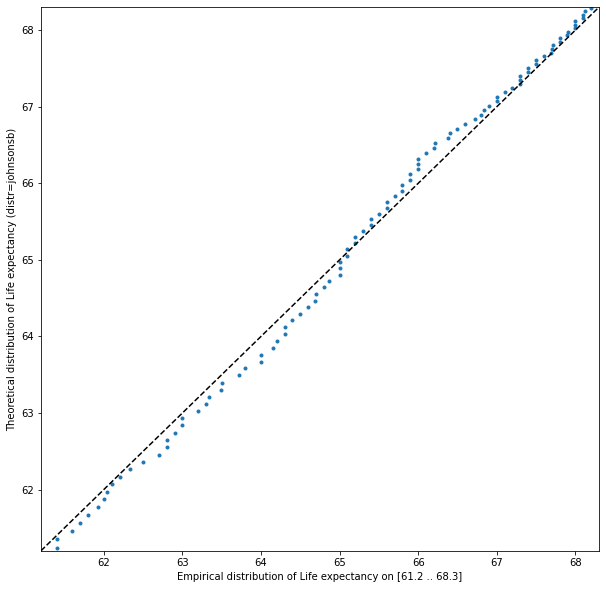

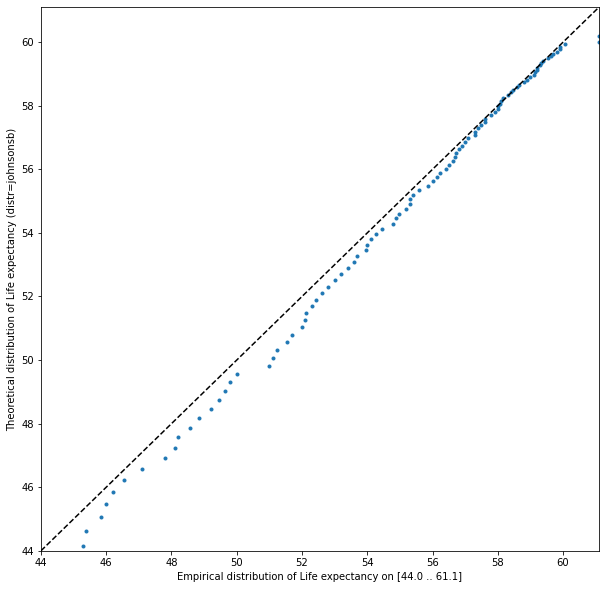

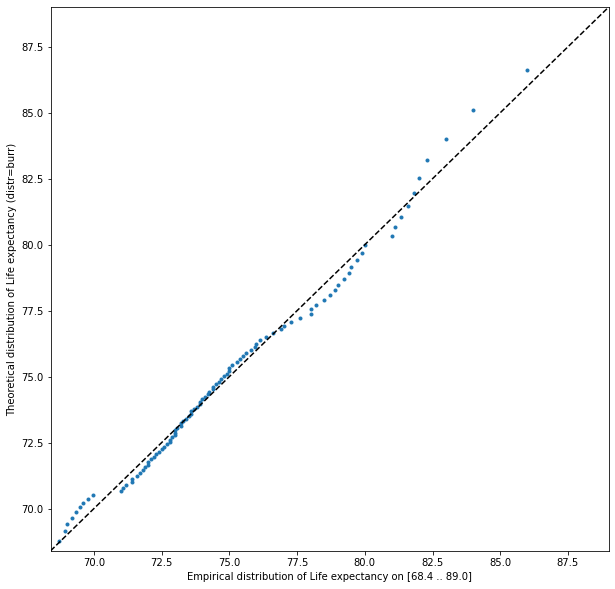

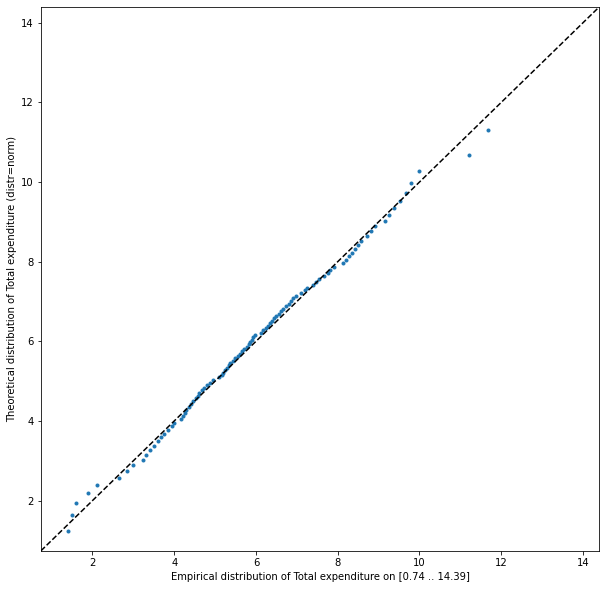

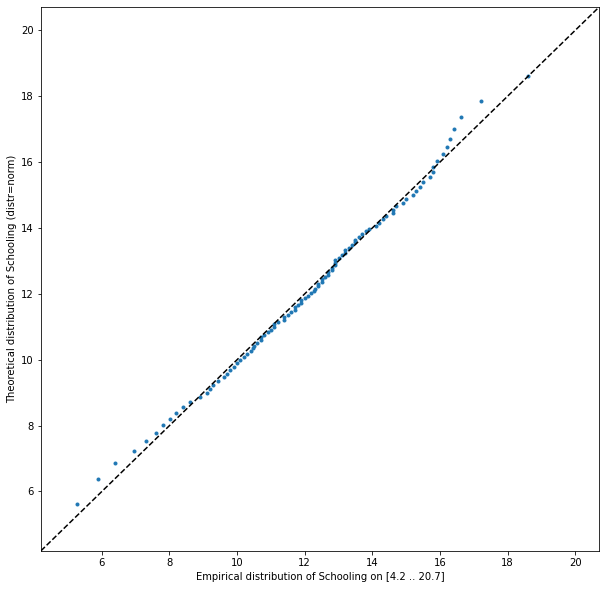

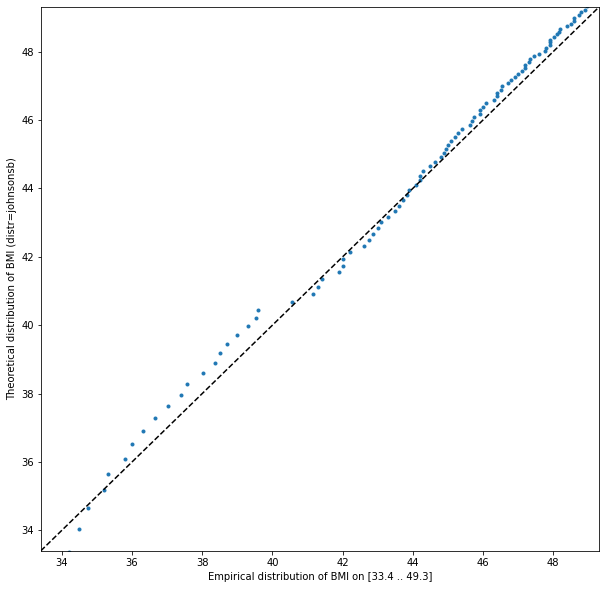

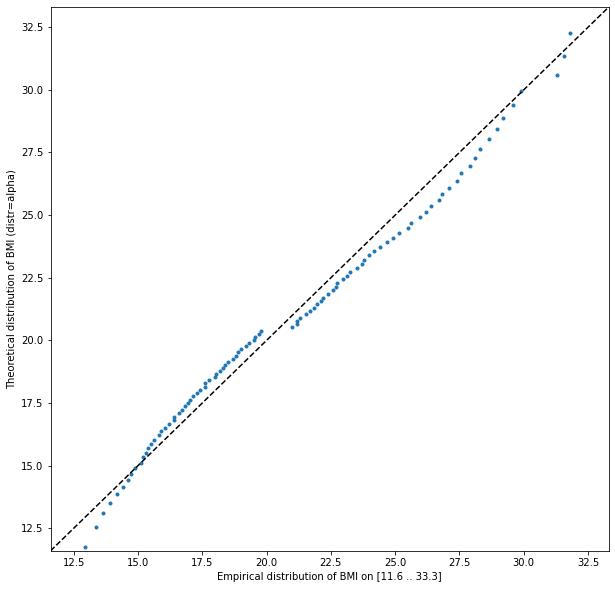

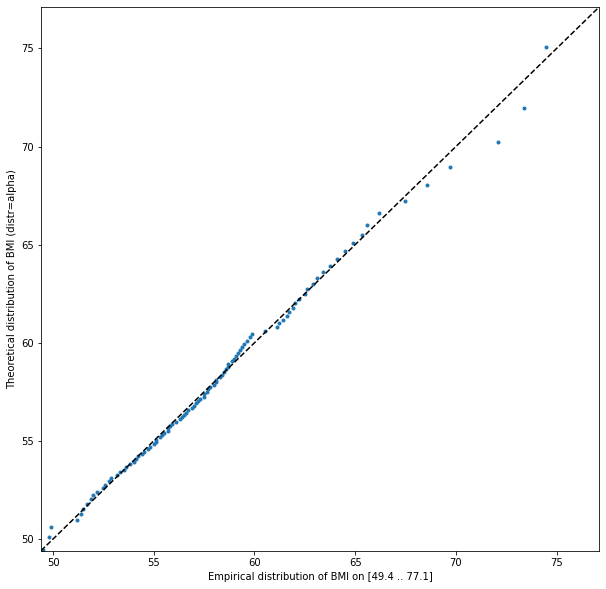

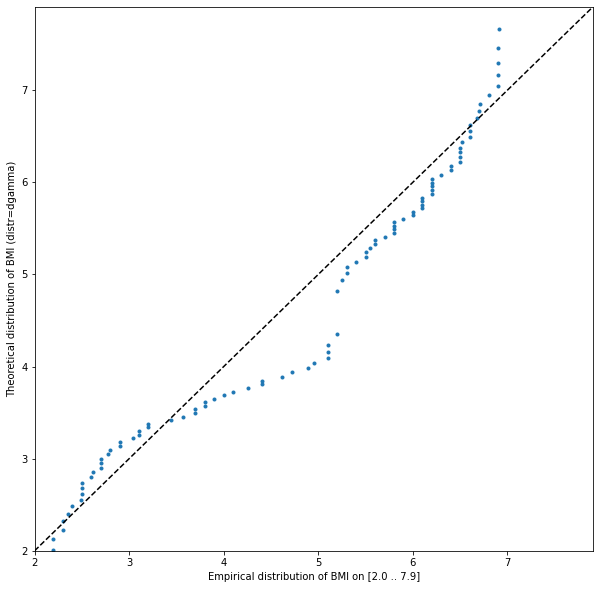

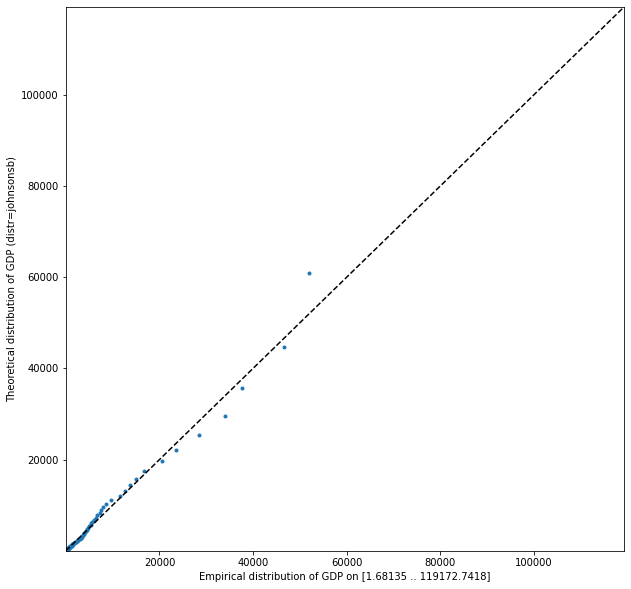

In [140]:
bins = 30

for results_for_var in results:
  for ix, result_for_piece in zip(range(len(results_for_var)), results_for_var):
    r_data = result_for_piece['piece']['data']
    var = result_for_piece['var']
    params = result_for_piece['params']
    distr = result_for_piece['distr']
    min_val = result_for_piece['piece']['min_val']
    max_val = result_for_piece['piece']['max_val']
    qq_biplot(r_data, var, distr, params)

# Step 7

Estimate correctness of fitted distributions using at least 2 statistical tests.

-------------------------

We have already used KStest when estimating our distributions. Here we do that again:

In [141]:
def cramervonmises(data, var, distr, params, significance=0.05):
  return scipy.stats.cramervonmises(data[var], distr, params).pvalue > significance

In [142]:
def kstest(data, var, distr, params, significance=0.05):
  return scipy.stats.kstest(data[var], distr, params).pvalue > significance

Sometimes Cramer von Mises test returns False when KStest returns True. This is OK.

In [146]:
res = []
for results_for_var in results:
  for result_for_piece in results_for_var:
    r_data = result_for_piece['piece']['data']
    var = result_for_piece['var']
    params = result_for_piece['params']
    distr = result_for_piece['distr']
    min_val = result_for_piece['piece']['min_val']
    max_val = result_for_piece['piece']['max_val']
    print('Variable= {}, distr= {}, min_val={}, max_val={}'.format(var, distr, min_val, max_val))
    c_res = cramervonmises(r_data, var, distr, params)
    ks_res = kstest(r_data, var, distr, params)
    res.append([var, str(min_val) + ' - ' + str(max_val), c_res, ks_res])
    print('  Cramer von Mises test result:   ', c_res)
    print('  Kolmogorov-Smirnov test result: ', ks_res)
pd.DataFrame(res, columns = ['name', 'range', 'Cramer von Mises test', 'KStest'])

Variable= Life expectancy, distr= johnsonsb, min_val=61.2, max_val=68.3
  Cramer von Mises test result:    True
  Kolmogorov-Smirnov test result:  True
Variable= Life expectancy, distr= johnsonsb, min_val=44.0, max_val=61.1
  Cramer von Mises test result:    True
  Kolmogorov-Smirnov test result:  True
Variable= Life expectancy, distr= burr, min_val=68.4, max_val=89.0
  Cramer von Mises test result:    True
  Kolmogorov-Smirnov test result:  True
Variable= Total expenditure, distr= norm, min_val=0.74, max_val=14.39
  Cramer von Mises test result:    True
  Kolmogorov-Smirnov test result:  True
Variable= Schooling, distr= norm, min_val=4.2, max_val=20.7
  Cramer von Mises test result:    True
  Kolmogorov-Smirnov test result:  True
Variable= BMI, distr= johnsonsb, min_val=33.4, max_val=49.3
  Cramer von Mises test result:    True
  Kolmogorov-Smirnov test result:  True
Variable= BMI, distr= alpha, min_val=11.6, max_val=33.3
  Cramer von Mises test result:    False
  Kolmogorov-Smirnov t

,name,range,Cramer von Mises test,KStest
0,Life expectancy,61.2 - 68.3,True,True
1,Life expectancy,44.0 - 61.1,True,True
2,Life expectancy,68.4 - 89.0,True,True
3,Total expenditure,0.74 - 14.39,True,True
4,Schooling,4.2 - 20.7,True,True
5,BMI,33.4 - 49.3,True,True
6,BMI,11.6 - 33.3,False,True
7,BMI,49.4 - 77.1,True,True
8,BMI,2.0 - 7.9,False,True
9,GDP,1.68135 - 119172.7418,True,True
